In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#读取因子截面残差的收益率数据
resid_ret1d = pd.read_csv('D:/191alphas/resid_ret1d.csv')
resid_ret2d = pd.read_csv('D:/191alphas/resid_ret2d.csv')
resid_ret3d = pd.read_csv('D:/191alphas/resid_ret3d.csv')
resid_ret4d = pd.read_csv('D:/191alphas/resid_ret4d.csv')
resid_ret5d = pd.read_csv('D:/191alphas/resid_ret5d.csv')

In [3]:
#drop多余列'Unnamed: 0'
resid_ret1d.drop(columns=['Unnamed: 0'], inplace=True)
resid_ret2d.drop(columns=['Unnamed: 0'], inplace=True)
resid_ret3d.drop(columns=['Unnamed: 0'], inplace=True)
resid_ret4d.drop(columns=['Unnamed: 0'], inplace=True)
resid_ret5d.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
resid_ret1d

,index,alpha_1_resid_ret,alpha_2_resid_ret,alpha_5_resid_ret,alpha_6_resid_ret,alpha_7_resid_ret,alpha_8_resid_ret,alpha_9_resid_ret,alpha_11_resid_ret,alpha_12_resid_ret,alpha_13_resid_ret,alpha_14_resid_ret,alpha_15_resid_ret,alpha_16_resid_ret,alpha_17_resid_ret,alpha_18_resid_ret,alpha_20_resid_ret,alpha_22_resid_ret,alpha_24_resid_ret,alpha_25_resid_ret,alpha_26_resid_ret,alpha_28_resid_ret,alpha_29_resid_ret,alpha_31_resid_ret,alpha_32_resid_ret,alpha_33_resid_ret,alpha_34_resid_ret,alpha_35_resid_ret,alpha_36_resid_ret,alpha_37_resid_ret,alpha_39_resid_ret,alpha_41_resid_ret,alpha_42_resid_ret,alpha_44_resid_ret,alpha_45_resid_ret,alpha_46_resid_ret,alpha_47_resid_ret,alpha_48_resid_ret,alpha_52_resid_ret,alpha_54_resid_ret,alpha_57_resid_ret,alpha_60_resid_ret,alpha_61_resid_ret,alpha_62_resid_ret,alpha_63_resid_ret,alpha_64_resid_ret,alpha_65_resid_ret,alpha_66_resid_ret,alpha_67_resid_ret,alpha_68_resid_ret,alpha_70_resid_ret,alpha_71_resid_ret,alpha_72_resid_ret,alpha_73_resid_ret,alpha_74_resid_ret,alpha_76_resid_ret,alpha_77_resid_ret,alpha_78_resid_ret,alpha_79_resid_ret,alpha_80_resid_ret,alpha_81_resid_ret,alpha_82_resid_ret,alpha_83_resid_ret,alpha_85_resid_ret,alpha_87_resid_ret,alpha_88_resid_ret,alpha_89_resid_ret,alpha_90_resid_ret,alpha_91_resid_ret,alpha_92_resid_ret,alpha_95_resid_ret,alpha_96_resid_ret,alpha_97_resid_ret,alpha_99_resid_ret,alpha_100_resid_ret,alpha_102_resid_ret,alpha_104_resid_ret,alpha_105_resid_ret,alpha_106_resid_ret,alpha_107_resid_ret,alpha_108_resid_ret,alpha_109_resid_ret,alpha_110_resid_ret,alpha_111_resid_ret,alpha_113_resid_ret,alpha_114_resid_ret,alpha_115_resid_ret,alpha_117_resid_ret,alpha_118_resid_ret,alpha_119_resid_ret,alpha_120_resid_ret,alpha_121_resid_ret,alpha_122_resid_ret,alpha_124_resid_ret,alpha_125_resid_ret,alpha_126_resid_ret,alpha_130_resid_ret,alpha_131_resid_ret,alpha_132_resid_ret,alpha_134_resid_ret,alpha_135_resid_ret,alpha_136_resid_ret,alpha_138_resid_ret,alpha_139_resid_ret,alpha_140_resid_ret,alpha_141_resid_ret,alpha_142_resid_ret,alpha_145_resid_ret,alpha_146_resid_ret,alpha_150_resid_ret,alpha_151_resid_ret,alpha_152_resid_ret,alpha_153_resid_ret,alpha_155_resid_ret,alpha_156_resid_ret,alpha_157_resid_ret,alpha_158_resid_ret,alpha_159_resid_ret,alpha_161_resid_ret,alpha_162_resid_ret,alpha_163_resid_ret,alpha_168_resid_ret,alpha_169_resid_ret,alpha_170_resid_ret,alpha_171_resid_ret,alpha_173_resid_ret,alpha_175_resid_ret,alpha_176_resid_ret,alpha_178_resid_ret,alpha_179_resid_ret,alpha_181_resid_ret,alpha_184_resid_ret,alpha_185_resid_ret,alpha_188_resid_ret,alpha_189_resid_ret,alpha_191_resid_ret,alpha_3_resid_ret,alpha_4_resid_ret,alpha_10_resid_ret,alpha_19_resid_ret,alpha_23_resid_ret,alpha_27_resid_ret,alpha_40_resid_ret,alpha_43_resid_ret,alpha_49_resid_ret,alpha_50_resid_ret,alpha_51_resid_ret,alpha_53_resid_ret,alpha_55_resid_ret,alpha_56_resid_ret,alpha_58_resid_ret,alpha_59_resid_ret,alpha_69_resid_ret,alpha_75_resid_ret,alpha_84_resid_ret,alpha_93_resid_ret,alpha_94_resid_ret,alpha_98_resid_ret,alpha_101_resid_ret,alpha_103_resid_ret,alpha_112_resid_ret,alpha_123_resid_ret,alpha_127_resid_ret,alpha_128_resid_ret,alpha_129_resid_ret,alpha_133_resid_ret,alpha_137_resid_ret,alpha_144_resid_ret,alpha_148_resid_ret,alpha_154_resid_ret,alpha_160_resid_ret,alpha_164_resid_ret,alpha_167_resid_ret,alpha_172_resid_ret,alpha_174_resid_ret,alpha_177_resid_ret,alpha_180_resid_ret,alpha_182_resid_ret,alpha_186_resid_ret,alpha_187_resid_ret
0,2012-03-12,0.001008,-0.001412,0.001067,0.001110,-0.001399,-0.000378,0.000551,0.001663,0.000620,-0.000243,0.001655,0.000635,0.001559,0.001412,0.001526,0.002233,-0.000103,0.002697,0.001294,0.001382,0.000278,0.001953,0.002402,0.000834,0.001693,0.002295,0.000709,0.000472,0.000922,0.001513,0.000306,0.000779,0.000753,0.001378,0.002584,0.002175,0.000158,0.002743,0.001797,0.002007,0.001864,0.001937,0.000161,0.002555,-0.000780,0.000941,0.000991,0.002968,0.001340,0.001527,0.003144,0.002439,-0.000248,0.001315,-0.000192,0

In [4]:
def get_retIR(data,window):
    
    data = data.describe()
    data.loc['mean_y',:] = data.loc['mean',:]*252/window #年化因子收益率均值
    data.loc['IR',:] = 252**0.5*(data.loc['mean',:]/window)/data.loc['std',:] #因子收益率IR 
    
    fig = plt.figure(figsize=(16,6))  #设置一个图像长宽 
    ax1 = fig.add_subplot(1,2,1)  #添加子图 add_subplot(行，列，第几张图)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_title('FR_DAY'+ str(window))
    ax2.set_title('IR_DAY'+ str(window))
    
    print(ax1.hist(data.loc['mean_y',:], bins = 20,rwidth=0.9))
    print('预测周期为'+str(window)+'天的年化因子收益率均值为:{}'.format(data.loc['mean_y',:].mean()))
    
    print(ax2.hist(data.loc['IR',:], bins = 20,rwidth=0.9))
    print('预测周期为'+str(window)+'天的因子收益率IR均值为:{}'.format(data.loc['IR',:].mean()))
    
    data = data.T
    return data

In [58]:
resid_ret1d17_22 = resid_ret1d[resid_ret1d['index'] >= '2017-01-01']

In [61]:
resid_ret1d12_16 = resid_ret1d[resid_ret1d['index'] < '2017-01-01']

In [64]:
retIR12_16.T

,alpha_1_resid_ret,alpha_2_resid_ret,alpha_5_resid_ret,alpha_6_resid_ret,alpha_7_resid_ret,alpha_8_resid_ret,alpha_9_resid_ret,alpha_11_resid_ret,alpha_12_resid_ret,alpha_13_resid_ret,alpha_14_resid_ret,alpha_15_resid_ret,alpha_16_resid_ret,alpha_17_resid_ret,alpha_18_resid_ret,alpha_20_resid_ret,alpha_22_resid_ret,alpha_24_resid_ret,alpha_25_resid_ret,alpha_26_resid_ret,alpha_28_resid_ret,alpha_29_resid_ret,alpha_31_resid_ret,alpha_32_resid_ret,alpha_33_resid_ret,alpha_34_resid_ret,alpha_35_resid_ret,alpha_36_resid_ret,alpha_37_resid_ret,alpha_39_resid_ret,alpha_41_resid_ret,alpha_42_resid_ret,alpha_44_resid_ret,alpha_45_resid_ret,alpha_46_resid_ret,alpha_47_resid_ret,alpha_48_resid_ret,alpha_52_resid_ret,alpha_54_resid_ret,alpha_57_resid_ret,alpha_60_resid_ret,alpha_61_resid_ret,alpha_62_resid_ret,alpha_63_resid_ret,alpha_64_resid_ret,alpha_65_resid_ret,alpha_66_resid_ret,alpha_67_resid_ret,alpha_68_resid_ret,alpha_70_resid_ret,alpha_71_resid_ret,alpha_72_resid_ret,alpha_73_resid_ret,alpha_74_resid_ret,alpha_76_resid_ret,alpha_77_resid_ret,alpha_78_resid_ret,alpha_79_resid_ret,alpha_80_resid_ret,alpha_81_resid_ret,alpha_82_resid_ret,alpha_83_resid_ret,alpha_85_resid_ret,alpha_87_resid_ret,alpha_88_resid_ret,alpha_89_resid_ret,alpha_90_resid_ret,alpha_91_resid_ret,alpha_92_resid_ret,alpha_95_resid_ret,alpha_96_resid_ret,alpha_97_resid_ret,alpha_99_resid_ret,alpha_100_resid_ret,alpha_102_resid_ret,alpha_104_resid_ret,alpha_105_resid_ret,alpha_106_resid_ret,alpha_107_resid_ret,alpha_108_resid_ret,alpha_109_resid_ret,alpha_110_resid_ret,alpha_111_resid_ret,alpha_113_resid_ret,alpha_114_resid_ret,alpha_115_resid_ret,alpha_117_resid_ret,alpha_118_resid_ret,alpha_119_resid_ret,alpha_120_resid_ret,alpha_121_resid_ret,alpha_122_resid_ret,alpha_124_resid_ret,alpha_125_resid_ret,alpha_126_resid_ret,alpha_130_resid_ret,alpha_131_resid_ret,alpha_132_resid_ret,alpha_134_resid_ret,alpha_135_resid_ret,alpha_136_resid_ret,alpha_138_resid_ret,alpha_139_resid_ret,alpha_140_resid_ret,alpha_141_resid_ret,alpha_142_resid_ret,alpha_145_resid_ret,alpha_146_resid_ret,alpha_150_resid_ret,alpha_151_resid_ret,alpha_152_resid_ret,alpha_153_resid_ret,alpha_155_resid_ret,alpha_156_resid_ret,alpha_157_resid_ret,alpha_158_resid_ret,alpha_159_resid_ret,alpha_161_resid_ret,alpha_162_resid_ret,alpha_163_resid_ret,alpha_168_resid_ret,alpha_169_resid_ret,alpha_170_resid_ret,alpha_171_resid_ret,alpha_173_resid_ret,alpha_175_resid_ret,alpha_176_resid_ret,alpha_178_resid_ret,alpha_179_resid_ret,alpha_181_resid_ret,alpha_184_resid_ret,alpha_185_resid_ret,alpha_188_resid_ret,alpha_189_resid_ret,alpha_191_resid_ret,alpha_3_resid_ret,alpha_4_resid_ret,alpha_10_resid_ret,alpha_19_resid_ret,alpha_23_resid_ret,alpha_27_resid_ret,alpha_40_resid_ret,alpha_43_resid_ret,alpha_49_resid_ret,alpha_50_resid_ret,alpha_51_resid_ret,alpha_53_resid_ret,alpha_55_resid_ret,alpha_56_resid_ret,alpha_58_resid_ret,alpha_59_resid_ret,alpha_69_resid_ret,alpha_75_resid_ret,alpha_84_resid_ret,alpha_93_resid_ret,alpha_94_resid_ret,alpha_98_resid_ret,alpha_101_resid_ret,alpha_103_resid_ret,alpha_112_resid_ret,alpha_123_resid_ret,alpha_127_resid_ret,alpha_128_resid_ret,alpha_129_resid_ret,alpha_133_resid_ret,alpha_137_resid_ret,alpha_144_resid_ret,alpha_148_resid_ret,alpha_154_resid_ret,alpha_160_resid_ret,alpha_164_resid_ret,alpha_167_resid_ret,alpha_172_resid_ret,alpha_174_resid_ret,alpha_177_resid_ret,alpha_180_resid_ret,alpha_182_resid_ret,alpha_186_resid_ret,alpha_187_resid_ret
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1

(array([ 1.,  4.,  5., 16., 19., 10., 14., 18., 18., 19., 18.,  9.,  4.,
        8.,  4.,  6.,  2.,  2.,  0.,  2.]), array([-0.04428158, -0.02882489, -0.0133682 ,  0.00208848,  0.01754517,
        0.03300186,  0.04845855,  0.06391524,  0.07937193,  0.09482861,
        0.1102853 ,  0.12574199,  0.14119868,  0.15665537,  0.17211205,
        0.18756874,  0.20302543,  0.21848212,  0.23393881,  0.2493955 ,
        0.26485218]), <BarContainer object of 20 artists>)
预测周期为1天的年化因子收益率均值为:0.08387128888638193
(array([ 2.,  3.,  7., 15., 15., 19., 20., 23., 19., 17., 10.,  8.,  7.,
        8.,  1.,  3.,  1.,  0.,  0.,  1.]), array([-1.87098499, -1.220859  , -0.57073301,  0.07939299,  0.72951898,
        1.37964497,  2.02977097,  2.67989696,  3.33002295,  3.98014895,
        4.63027494,  5.28040093,  5.93052693,  6.58065292,  7.23077891,
        7.88090491,  8.5310309 ,  9.18115689,  9.83128289, 10.48140888,
       11.13153487]), <BarContainer object of 20 artists>)
预测周期为1天的因子收益率IR均值为:3.089304186679

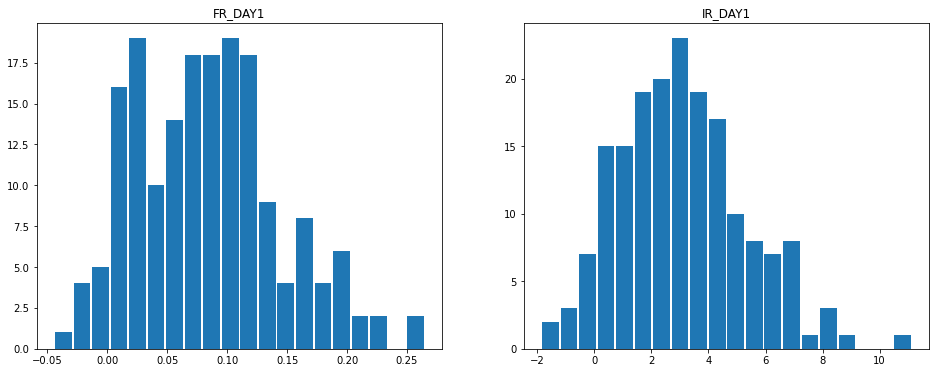

In [62]:
retIR12_16 = get_retIR(resid_ret1d12_16,1)

(array([ 2.,  7., 10., 24., 22., 33., 19., 18., 10., 16.,  5.,  1.,  4.,
        3.,  1.,  1.,  2.,  0.,  0.,  1.]), array([-0.04959097, -0.03443028, -0.01926959, -0.0041089 ,  0.01105179,
        0.02621248,  0.04137317,  0.05653386,  0.07169455,  0.08685524,
        0.10201593,  0.11717662,  0.13233731,  0.147498  ,  0.16265869,
        0.17781938,  0.19298007,  0.20814076,  0.22330145,  0.23846214,
        0.25362283]), <BarContainer object of 20 artists>)
预测周期为1天的年化因子收益率均值为:0.04629590957797299
(array([ 1.,  0.,  0.,  1.,  7., 21., 40., 31., 16., 21., 15.,  7.,  9.,
        3.,  3.,  1.,  1.,  0.,  1.,  1.]), array([-4.88006196, -4.03763466, -3.19520737, -2.35278007, -1.51035277,
       -0.66792548,  0.17450182,  1.01692912,  1.85935641,  2.70178371,
        3.544211  ,  4.3866383 ,  5.2290656 ,  6.07149289,  6.91392019,
        7.75634749,  8.59877478,  9.44120208, 10.28362937, 11.12605667,
       11.96848397]), <BarContainer object of 20 artists>)
预测周期为1天的因子收益率IR均值为:2.103008634590

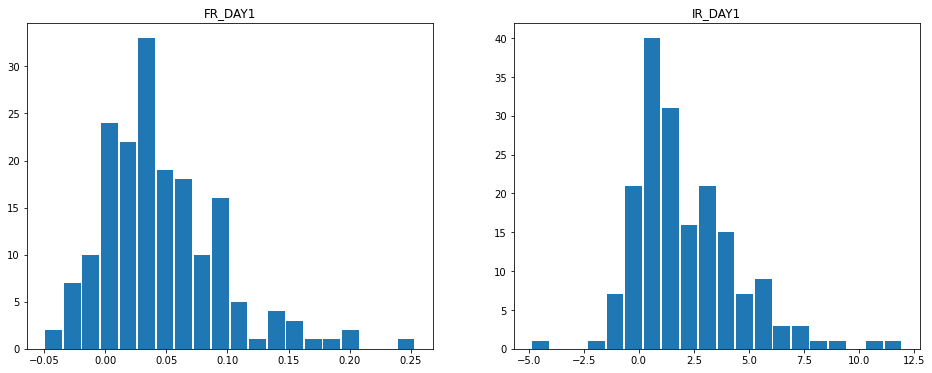

In [60]:
retIR17_22 = get_retIR(resid_ret1d17_22,1)

In [59]:
resid_ret1d17_22

,index,alpha_1_resid_ret,alpha_2_resid_ret,alpha_5_resid_ret,alpha_6_resid_ret,alpha_7_resid_ret,alpha_8_resid_ret,alpha_9_resid_ret,alpha_11_resid_ret,alpha_12_resid_ret,alpha_13_resid_ret,alpha_14_resid_ret,alpha_15_resid_ret,alpha_16_resid_ret,alpha_17_resid_ret,alpha_18_resid_ret,alpha_20_resid_ret,alpha_22_resid_ret,alpha_24_resid_ret,alpha_25_resid_ret,alpha_26_resid_ret,alpha_28_resid_ret,alpha_29_resid_ret,alpha_31_resid_ret,alpha_32_resid_ret,alpha_33_resid_ret,alpha_34_resid_ret,alpha_35_resid_ret,alpha_36_resid_ret,alpha_37_resid_ret,alpha_39_resid_ret,alpha_41_resid_ret,alpha_42_resid_ret,alpha_44_resid_ret,alpha_45_resid_ret,alpha_46_resid_ret,alpha_47_resid_ret,alpha_48_resid_ret,alpha_52_resid_ret,alpha_54_resid_ret,alpha_57_resid_ret,alpha_60_resid_ret,alpha_61_resid_ret,alpha_62_resid_ret,alpha_63_resid_ret,alpha_64_resid_ret,alpha_65_resid_ret,alpha_66_resid_ret,alpha_67_resid_ret,alpha_68_resid_ret,alpha_70_resid_ret,alpha_71_resid_ret,alpha_72_resid_ret,alpha_73_resid_ret,alpha_74_resid_ret,alpha_76_resid_ret,alpha_77_resid_ret,alpha_78_resid_ret,alpha_79_resid_ret,alpha_80_resid_ret,alpha_81_resid_ret,alpha_82_resid_ret,alpha_83_resid_ret,alpha_85_resid_ret,alpha_87_resid_ret,alpha_88_resid_ret,alpha_89_resid_ret,alpha_90_resid_ret,alpha_91_resid_ret,alpha_92_resid_ret,alpha_95_resid_ret,alpha_96_resid_ret,alpha_97_resid_ret,alpha_99_resid_ret,alpha_100_resid_ret,alpha_102_resid_ret,alpha_104_resid_ret,alpha_105_resid_ret,alpha_106_resid_ret,alpha_107_resid_ret,alpha_108_resid_ret,alpha_109_resid_ret,alpha_110_resid_ret,alpha_111_resid_ret,alpha_113_resid_ret,alpha_114_resid_ret,alpha_115_resid_ret,alpha_117_resid_ret,alpha_118_resid_ret,alpha_119_resid_ret,alpha_120_resid_ret,alpha_121_resid_ret,alpha_122_resid_ret,alpha_124_resid_ret,alpha_125_resid_ret,alpha_126_resid_ret,alpha_130_resid_ret,alpha_131_resid_ret,alpha_132_resid_ret,alpha_134_resid_ret,alpha_135_resid_ret,alpha_136_resid_ret,alpha_138_resid_ret,alpha_139_resid_ret,alpha_140_resid_ret,alpha_141_resid_ret,alpha_142_resid_ret,alpha_145_resid_ret,alpha_146_resid_ret,alpha_150_resid_ret,alpha_151_resid_ret,alpha_152_resid_ret,alpha_153_resid_ret,alpha_155_resid_ret,alpha_156_resid_ret,alpha_157_resid_ret,alpha_158_resid_ret,alpha_159_resid_ret,alpha_161_resid_ret,alpha_162_resid_ret,alpha_163_resid_ret,alpha_168_resid_ret,alpha_169_resid_ret,alpha_170_resid_ret,alpha_171_resid_ret,alpha_173_resid_ret,alpha_175_resid_ret,alpha_176_resid_ret,alpha_178_resid_ret,alpha_179_resid_ret,alpha_181_resid_ret,alpha_184_resid_ret,alpha_185_resid_ret,alpha_188_resid_ret,alpha_189_resid_ret,alpha_191_resid_ret,alpha_3_resid_ret,alpha_4_resid_ret,alpha_10_resid_ret,alpha_19_resid_ret,alpha_23_resid_ret,alpha_27_resid_ret,alpha_40_resid_ret,alpha_43_resid_ret,alpha_49_resid_ret,alpha_50_resid_ret,alpha_51_resid_ret,alpha_53_resid_ret,alpha_55_resid_ret,alpha_56_resid_ret,alpha_58_resid_ret,alpha_59_resid_ret,alpha_69_resid_ret,alpha_75_resid_ret,alpha_84_resid_ret,alpha_93_resid_ret,alpha_94_resid_ret,alpha_98_resid_ret,alpha_101_resid_ret,alpha_103_resid_ret,alpha_112_resid_ret,alpha_123_resid_ret,alpha_127_resid_ret,alpha_128_resid_ret,alpha_129_resid_ret,alpha_133_resid_ret,alpha_137_resid_ret,alpha_144_resid_ret,alpha_148_resid_ret,alpha_154_resid_ret,alpha_160_resid_ret,alpha_164_resid_ret,alpha_167_resid_ret,alpha_172_resid_ret,alpha_174_resid_ret,alpha_177_resid_ret,alpha_180_resid_ret,alpha_182_resid_ret,alpha_186_resid_ret,alpha_187_resid_ret
1171,2017-01-03,0.002009,0.001366,0.001205,-0.000818,0.000260,0.001968,0.002136,0.001476,0.002477,0.000857,0.002161,0.001646,0.001375,0.002215,0.001954,0.001909,0.001746,0.002806,0.002078,0.001990,0.000353,0.001340,0.001760,0.000725,0.001664,0.001783,0.000569,0.000887,0.000644,0.001769,0.000285,0.000460,0.000654,-0.000716,0.001724,0.002595,0.001353,0.000958,-0.000573,0.002515,0.001203,0.001103,0.000377,0.002405,0.000472,0.000992,0.000990,0.001782,0.002192,-0.000834,0.001910,0.002422,0.001170,-0.000174,-0.000926,

(array([ 5., 15., 17., 13., 12., 20., 25., 12., 18., 13.,  6.,  6.,  3.,
        3.,  4.,  4.,  1.,  0.,  1.,  1.]), array([-0.01770467, -0.00536061,  0.00698344,  0.0193275 ,  0.03167155,
        0.04401561,  0.05635966,  0.06870372,  0.08104777,  0.09339183,
        0.10573588,  0.11807994,  0.13042399,  0.14276805,  0.1551121 ,
        0.16745615,  0.17980021,  0.19214426,  0.20448832,  0.21683237,
        0.22917643]), <BarContainer object of 20 artists>)
预测周期为1天的年化因子收益率均值为:0.0645838435639027
(array([ 5., 17., 16., 24., 23., 22., 16., 16.,  6., 13.,  4.,  7.,  6.,
        2.,  0.,  0.,  0.,  1.,  0.,  1.]), array([-0.84749103, -0.25457838,  0.33833426,  0.93124691,  1.52415956,
        2.1170722 ,  2.70998485,  3.3028975 ,  3.89581014,  4.48872279,
        5.08163543,  5.67454808,  6.26746073,  6.86037337,  7.45328602,
        8.04619867,  8.63911131,  9.23202396,  9.8249366 , 10.41784925,
       11.0107619 ]), <BarContainer object of 20 artists>)
预测周期为1天的因子收益率IR均值为:2.5854739781790

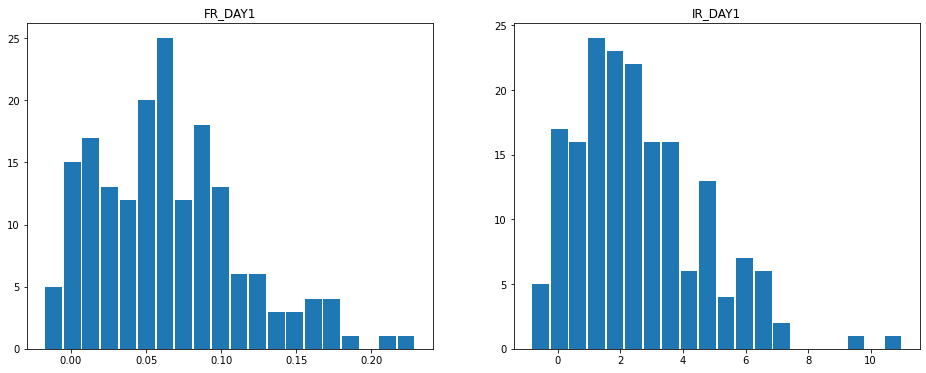

In [5]:
test1d = get_retIR(resid_ret1d,window=1)

In [6]:
test1d

,count,mean,std,min,25%,50%,75%,max,mean_y,IR
alpha_1_resid_ret,2406.0,0.000443,0.001454,-0.011211,-0.000267,0.000395,0.001071,0.024291,0.111635,4.836080
alpha_2_resid_ret,2406.0,0.000344,0.001557,-0.004316,-0.000666,0.000195,0.001138,0.004706,0.086725,3.508325
alpha_5_resid_ret,2406.0,0.000368,0.000922,-0.002473,-0.000211,0.000342,0.000924,0.003156,0.092611,6.327397
alpha_6_resid_ret,2406.0,-0.000034,0.000689,-0.002259,-0.000496,-0.000062,0.000380,0.002134,-0.008551,-0.781212
alpha_7_resid_ret,2406.0,0.000099,0.001208,-0.003427,-0.000612,0.000083,0.000790,0.003593,0.025070,1.307279
...,...,...,...,...,...,...,...,...,...,...
alpha_177_resid_ret,2406.0,0.000235,0.001744,-0.004874,-0.000805,0.000228,0.001237,0.005329,0.059209,2.139119
alpha_180_resid_ret,2406.0,0.000290,0.001366,-0.003642,-0.000493,0.000301,0.001084,0.004244,0.073041,3.369280
alpha_182_resid_ret,2406.0,0.000243,0.001247,-0.003505,-0.000514,0.000241,0.000983,0.003986,0.061130,3.087149
alpha_186_resid_ret,2406.0,0.000054,0.001220,-0.003458,-0.000647,0.000044,0.000766,0.003546,0.013650,0.704590


(array([ 1.,  3.,  4.,  9.,  9., 19., 12., 12., 23., 21., 27., 15.,  7.,
        6.,  4.,  3.,  3.,  0.,  0.,  1.]), array([-0.04958171, -0.03638955, -0.02319739, -0.01000522,  0.00318694,
        0.01637911,  0.02957127,  0.04276343,  0.0559556 ,  0.06914776,
        0.08233993,  0.09553209,  0.10872425,  0.12191642,  0.13510858,
        0.14830075,  0.16149291,  0.17468507,  0.18787724,  0.2010694 ,
        0.21426157]), <BarContainer object of 20 artists>)
预测周期为2天的年化因子收益率均值为:0.06471603058149561
(array([ 2.,  7.,  7., 16., 15., 23., 29., 26., 15., 11.,  7.,  9.,  8.,
        2.,  0.,  1.,  0.,  0.,  0.,  1.]), array([-1.21910415, -0.78164652, -0.34418889,  0.09326874,  0.53072638,
        0.96818401,  1.40564164,  1.84309927,  2.2805569 ,  2.71801454,
        3.15547217,  3.5929298 ,  4.03038743,  4.46784506,  4.9053027 ,
        5.34276033,  5.78021796,  6.21767559,  6.65513323,  7.09259086,
        7.53004849]), <BarContainer object of 20 artists>)
预测周期为2天的因子收益率IR均值为:1.795580785993

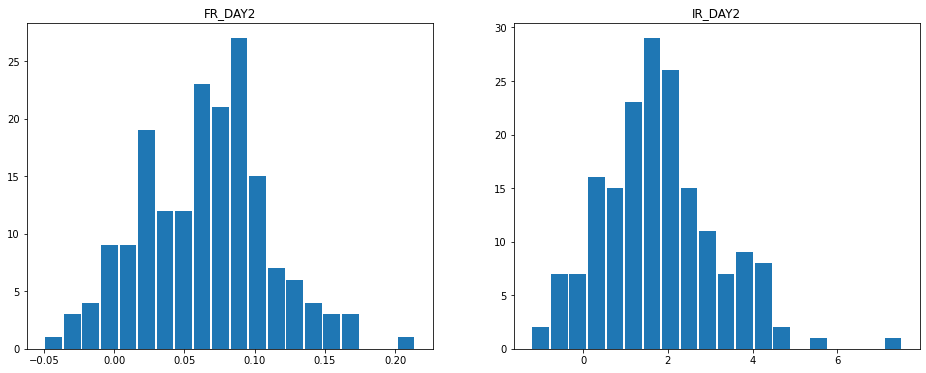

In [7]:
test2d = get_retIR(resid_ret2d,window=2)

(array([ 3.,  2.,  3.,  8., 13., 16., 13., 13., 20., 25., 25., 21.,  5.,
        6.,  3.,  0.,  2.,  0.,  0.,  1.]), array([-0.04749569, -0.03499201, -0.02248833, -0.00998465,  0.00251903,
        0.01502271,  0.02752638,  0.04003006,  0.05253374,  0.06503742,
        0.0775411 ,  0.09004478,  0.10254846,  0.11505214,  0.12755582,
        0.1400595 ,  0.15256318,  0.16506686,  0.17757054,  0.19007421,
        0.20257789]), <BarContainer object of 20 artists>)
预测周期为3天的年化因子收益率均值为:0.05889168979446052
(array([ 3.,  3.,  8., 11., 20., 16., 38., 26., 13., 13., 10.,  9.,  5.,
        2.,  1.,  0.,  0.,  0.,  0.,  1.]), array([-1.06356876, -0.72045498, -0.37734119, -0.0342274 ,  0.30888639,
        0.65200017,  0.99511396,  1.33822775,  1.68134154,  2.02445532,
        2.36756911,  2.7106829 ,  3.05379669,  3.39691047,  3.74002426,
        4.08313805,  4.42625184,  4.76936562,  5.11247941,  5.4555932 ,
        5.79870699]), <BarContainer object of 20 artists>)
预测周期为3天的因子收益率IR均值为:1.335526710962

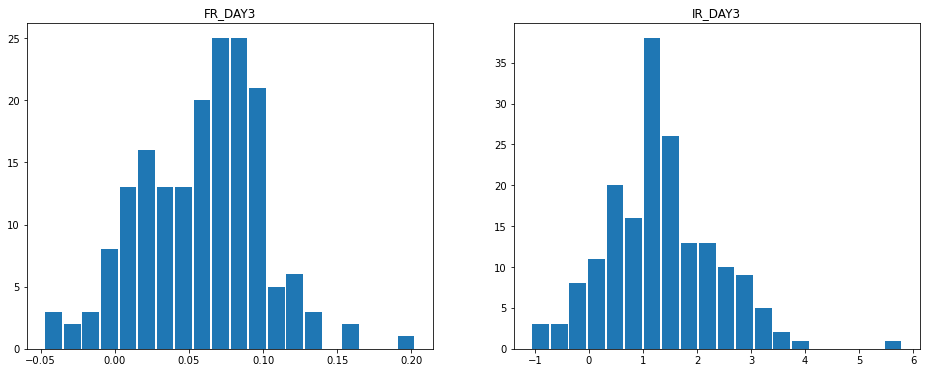

In [8]:
test3d = get_retIR(resid_ret3d,window=3)

(array([ 3.,  2.,  3.,  4.,  9., 19., 11., 15., 19., 23., 25., 24., 12.,
        5.,  2.,  0.,  1.,  1.,  0.,  1.]), array([-0.05166529, -0.03956349, -0.02746169, -0.01535989, -0.0032581 ,
        0.0088437 ,  0.0209455 ,  0.0330473 ,  0.0451491 ,  0.0572509 ,
        0.06935269,  0.08145449,  0.09355629,  0.10565809,  0.11775989,
        0.12986169,  0.14196348,  0.15406528,  0.16616708,  0.17826888,
        0.19037068]), <BarContainer object of 20 artists>)
预测周期为4天的年化因子收益率均值为:0.05493566243182902
(array([ 4.,  1.,  6.,  9., 20., 18., 29., 34., 16., 12., 11.,  9.,  6.,
        2.,  1.,  0.,  0.,  0.,  0.,  1.]), array([-0.97317533, -0.68735915, -0.40154296, -0.11572678,  0.17008941,
        0.45590559,  0.74172178,  1.02753796,  1.31335415,  1.59917033,
        1.88498652,  2.1708027 ,  2.45661889,  2.74243507,  3.02825126,
        3.31406744,  3.59988362,  3.88569981,  4.17151599,  4.45733218,
        4.74314836]), <BarContainer object of 20 artists>)
预测周期为4天的因子收益率IR均值为:1.083790376721

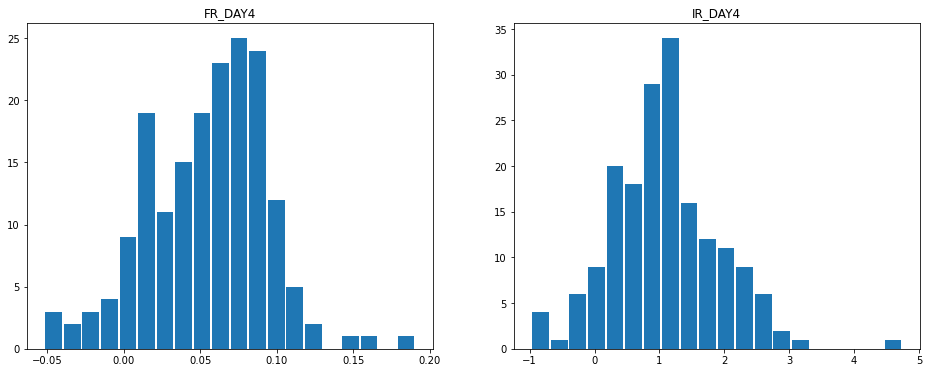

In [9]:
test4d = get_retIR(resid_ret4d,window=4)

(array([ 1.,  2.,  3.,  2.,  8., 12., 17., 13., 18., 25., 28., 22., 20.,
        4.,  1.,  0.,  2.,  0.,  0.,  1.]), array([-0.06521816, -0.05245657, -0.03969498, -0.02693338, -0.01417179,
       -0.0014102 ,  0.01135139,  0.02411299,  0.03687458,  0.04963617,
        0.06239776,  0.07515936,  0.08792095,  0.10068254,  0.11344413,
        0.12620573,  0.13896732,  0.15172891,  0.16449051,  0.1772521 ,
        0.19001369]), <BarContainer object of 20 artists>)
预测周期为5天的年化因子收益率均值为:0.051326914394544655
(array([ 2.,  4.,  0., 11., 14., 17., 30., 30., 25., 16., 13.,  9.,  6.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.]), array([-1.07706089, -0.81102428, -0.54498767, -0.27895106, -0.01291445,
        0.25312216,  0.51915877,  0.78519538,  1.05123199,  1.3172686 ,
        1.58330521,  1.84934182,  2.11537843,  2.38141504,  2.64745165,
        2.91348826,  3.17952487,  3.44556148,  3.71159809,  3.9776347 ,
        4.24367131]), <BarContainer object of 20 artists>)
预测周期为5天的因子收益率IR均值为:0.91076042990

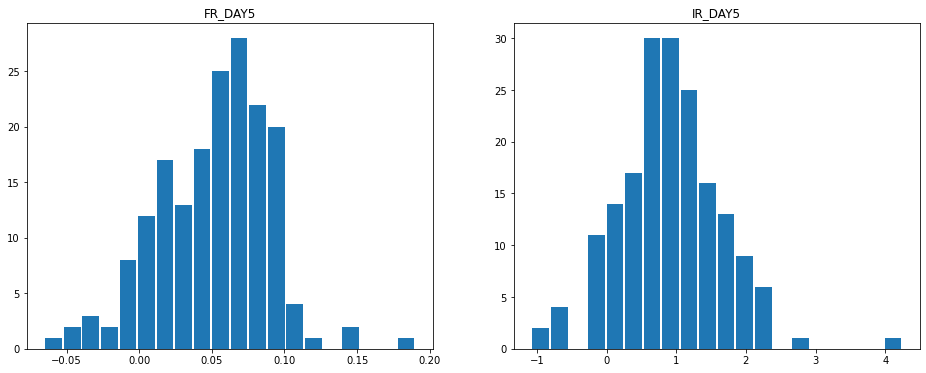

In [10]:
test5d = get_retIR(resid_ret5d,window=5)

In [11]:
def screen_factor(data,IR_line):
    data.sort_values(by = 'IR', ascending=False, inplace=True)#因子按IR排序
    data = data[data['IR']>IR_line].index.to_frame().reset_index(drop = True)
    return data

In [12]:
#按IR排序筛选因子
factor_1d = screen_factor(test1d,1)#周期1d
factor_2d = screen_factor(test2d,1)#周期2d
factor_3d = screen_factor(test3d,1)#周期3d
factor_4d = screen_factor(test4d,1)#周期4d
factor_5d = screen_factor(test5d,1)#周期5d

In [13]:
factor_1d.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,alpha_15_resid_ret,alpha_120_resid_ret,alpha_80_resid_ret,alpha_32_resid_ret,alpha_16_resid_ret,alpha_42_resid_ret,alpha_13_resid_ret,alpha_124_resid_ret,alpha_102_resid_ret,alpha_5_resid_ret,alpha_168_resid_ret,alpha_11_resid_ret,alpha_36_resid_ret,alpha_114_resid_ret,alpha_12_resid_ret,alpha_74_resid_ret,alpha_140_resid_ret,alpha_179_resid_ret,alpha_108_resid_ret,alpha_9_resid_ret,alpha_68_resid_ret,alpha_90_resid_ret,alpha_139_resid_ret,alpha_109_resid_ret,alpha_62_resid_ret,alpha_1_resid_ret,alpha_107_resid_ret,alpha_145_resid_ret,alpha_176_resid_ret,alpha_60_resid_ret,alpha_188_resid_ret,alpha_91_resid_ret,alpha_105_resid_ret,alpha_158_resid_ret,alpha_121_resid_ret,alpha_75_resid_ret,alpha_163_resid_ret,alpha_99_resid_ret,alpha_171_resid_ret,alpha_48_resid_ret,alpha_3_resid_ret,alpha_83_resid_ret,alpha_100_resid_ret,alpha_4_resid_ret,alpha_156_resid_ret,alpha_73_resid_ret,alpha_55_resid_ret,alpha_97_resid_ret,alpha_43_resid_ret,alpha_2_resid_ret,alpha_150_resid_ret,alpha_95_resid_ret,alpha_35_resid_ret,alpha_85_resid_ret,alpha_155_resid_ret,alpha_180_resid_ret,alpha_41_resid_ret,alpha_136_resid_ret,alpha_24_resid_ret,alpha_70_resid_ret,alpha_141_resid_ret,alpha_40_resid_ret,alpha_182_resid_ret,alpha_77_resid_ret,alpha_131_resid_ret,alpha_128_resid_ret,alpha_104_resid_ret,alpha_191_resid_ret,alpha_118_resid_ret,alpha_33_resid_ret,alpha_117_resid_ret,alpha_14_resid_ret,alpha_130_resid_ret,alpha_122_resid_ret,alpha_185_resid_ret,alpha_72_resid_ret,alpha_82_resid_ret,alpha_47_resid_ret,alpha_81_resid_ret,alpha_69_resid_ret,alpha_17_resid_ret,alpha_94_resid_ret,alpha_184_resid_ret,alpha_84_resid_ret,alpha_135_resid_ret,alpha_113_resid_ret,alpha_87_resid_ret,alpha_59_resid_ret,alpha_61_resid_ret,alpha_29_resid_ret,alpha_159_resid_ret,alpha_151_resid_ret,alpha_177_resid_ret,alpha_111_resid_ret,alpha_96_resid_ret,alpha_170_resid_ret,alpha_101_resid_ret,alpha_54_resid_ret,alpha_152_resid_ret,alpha_52_resid_ret,alpha_169_resid_ret,alpha_27_resid_ret,alpha_58_resid_ret,alpha_53_resid_ret,alpha_92_resid_ret,alpha_20_resid_ret,alpha_89_resid_ret,alpha_18_resid_ret,alpha_106_resid_ret,alpha_19_resid_ret,alpha_57_resid_ret,alpha_25_resid_ret,alpha_88_resid_ret,alpha_133_resid_ret,alpha_71_resid_ret,alpha_23_resid_ret,alpha_67_resid_ret,alpha_50_resid_ret,alpha_51_resid_ret,alpha_49_resid_ret,alpha_26_resid_ret,alpha_39_resid_ret,alpha_79_resid_ret,alpha_28_resid_ret,alpha_154_resid_ret,alpha_64_resid_ret,alpha_31_resid_ret,alpha_7_resid_ret,alpha_119_resid_ret,alpha_76_resid_ret,alpha_34_resid_ret,alpha_123_resid_ret,alpha_46_resid_ret,alpha_142_resid_ret,alpha_132_resid_ret,alpha_93_resid_ret


In [14]:
factor_12 = pd.merge(factor_1d, factor_2d)

In [15]:
factor_12 #有123个因子的1d、2d的IR值都大于1

,0
0,alpha_15_resid_ret
1,alpha_120_resid_ret
2,alpha_80_resid_ret
3,alpha_32_resid_ret
4,alpha_16_resid_ret
...,...
118,alpha_79_resid_ret
119,alpha_31_resid_ret
120,alpha_34_resid_ret
121,alpha_123_resid_ret


In [16]:
factor_123 = pd.merge(factor_12, factor_3d)

In [17]:
factor_123 #有111个因子的1d、2d、3d的IR值都大于1

,0
0,alpha_15_resid_ret
1,alpha_120_resid_ret
2,alpha_80_resid_ret
3,alpha_32_resid_ret
4,alpha_16_resid_ret
...,...
106,alpha_39_resid_ret
107,alpha_79_resid_ret
108,alpha_31_resid_ret
109,alpha_34_resid_ret


In [18]:
factor_1234 = pd.merge(factor_123, factor_4d)

In [19]:
factor_1234 #有90个因子的1d、2d、3d、4d的IR值都大于1

,0
0,alpha_15_resid_ret
1,alpha_120_resid_ret
2,alpha_80_resid_ret
3,alpha_32_resid_ret
4,alpha_16_resid_ret
...,...
85,alpha_26_resid_ret
86,alpha_79_resid_ret
87,alpha_31_resid_ret
88,alpha_34_resid_ret


In [20]:
factor_12345 = pd.merge(factor_1234, factor_5d)

In [21]:
factor_12345 #有72个因子的1d、2d、3d、4d、5d的IR值都大于1

,0
0,alpha_15_resid_ret
1,alpha_120_resid_ret
2,alpha_80_resid_ret
3,alpha_32_resid_ret
4,alpha_16_resid_ret
...,...
70,alpha_25_resid_ret
71,alpha_26_resid_ret
72,alpha_31_resid_ret
73,alpha_34_resid_ret


In [22]:
#需要保留的因子的列表,共123个因子，因子的1d、2d的IR值都大于1
keep_list = list(factor_12[0])

In [23]:
keep_list

['alpha_15_resid_ret',
 'alpha_120_resid_ret',
 'alpha_80_resid_ret',
 'alpha_32_resid_ret',
 'alpha_16_resid_ret',
 'alpha_42_resid_ret',
 'alpha_13_resid_ret',
 'alpha_124_resid_ret',
 'alpha_102_resid_ret',
 'alpha_5_resid_ret',
 'alpha_168_resid_ret',
 'alpha_11_resid_ret',
 'alpha_36_resid_ret',
 'alpha_114_resid_ret',
 'alpha_12_resid_ret',
 'alpha_74_resid_ret',
 'alpha_140_resid_ret',
 'alpha_179_resid_ret',
 'alpha_108_resid_ret',
 'alpha_9_resid_ret',
 'alpha_68_resid_ret',
 'alpha_90_resid_ret',
 'alpha_139_resid_ret',
 'alpha_109_resid_ret',
 'alpha_62_resid_ret',
 'alpha_1_resid_ret',
 'alpha_107_resid_ret',
 'alpha_145_resid_ret',
 'alpha_176_resid_ret',
 'alpha_60_resid_ret',
 'alpha_188_resid_ret',
 'alpha_91_resid_ret',
 'alpha_105_resid_ret',
 'alpha_158_resid_ret',
 'alpha_121_resid_ret',
 'alpha_75_resid_ret',
 'alpha_163_resid_ret',
 'alpha_99_resid_ret',
 'alpha_171_resid_ret',
 'alpha_48_resid_ret',
 'alpha_3_resid_ret',
 'alpha_83_resid_ret',
 'alpha_100_resid_r

In [24]:
test1d_head123 = test1d[test1d.index.isin(keep_list)]
test2d_head123 = test2d[test2d.index.isin(keep_list)]
test3d_head123 = test3d[test3d.index.isin(keep_list)]
test4d_head123 = test4d[test4d.index.isin(keep_list)]
test5d_head123 = test5d[test5d.index.isin(keep_list)]

In [25]:
def show_head123(data,window):
    
    fig = plt.figure(figsize=(16,6))  #设置一个图像长宽 
    ax1 = fig.add_subplot(1,2,1)  #添加子图 add_subplot(行，列，第几张图)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_title('FR_DAY'+ str(window))
    ax2.set_title('IR_DAY'+ str(window))
    
    print(ax1.hist(data.loc[:,'mean_y'], bins = 20,rwidth=0.9))
    print('预测周期为'+str(window)+'天的年化因子收益率均值为:{}'.format(data.loc[:,'mean_y'].mean()))
    
    print(ax2.hist(data.loc[:,'IR'], bins = 20,rwidth=0.9))
    print('预测周期为'+str(window)+'天的因子收益率IR均值为:{}'.format(data.loc[:,'IR'].mean()))

(array([ 6.,  6., 17., 16., 15., 12., 15.,  8.,  5.,  4.,  4.,  1.,  5.,
        2.,  4.,  1.,  0.,  1.,  0.,  1.]), array([0.02609841, 0.03625231, 0.04640621, 0.05656011, 0.06671401,
       0.07686791, 0.08702182, 0.09717572, 0.10732962, 0.11748352,
       0.12763742, 0.13779132, 0.14794522, 0.15809912, 0.16825302,
       0.17840692, 0.18856083, 0.19871473, 0.20886863, 0.21902253,
       0.22917643]), <BarContainer object of 20 artists>)
预测周期为1天的年化因子收益率均值为:0.08639391036261314
(array([14., 18., 19., 13., 13.,  8.,  5., 12.,  4.,  4.,  6.,  5.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.]), array([ 1.14516325,  1.63844318,  2.13172311,  2.62500305,  3.11828298,
        3.61156291,  4.10484284,  4.59812278,  5.09140271,  5.58468264,
        6.07796257,  6.57124251,  7.06452244,  7.55780237,  8.0510823 ,
        8.54436224,  9.03764217,  9.5309221 , 10.02420203, 10.51748196,
       11.0107619 ]), <BarContainer object of 20 artists>)
预测周期为1天的因子收益率IR均值为:3.4640019088227327


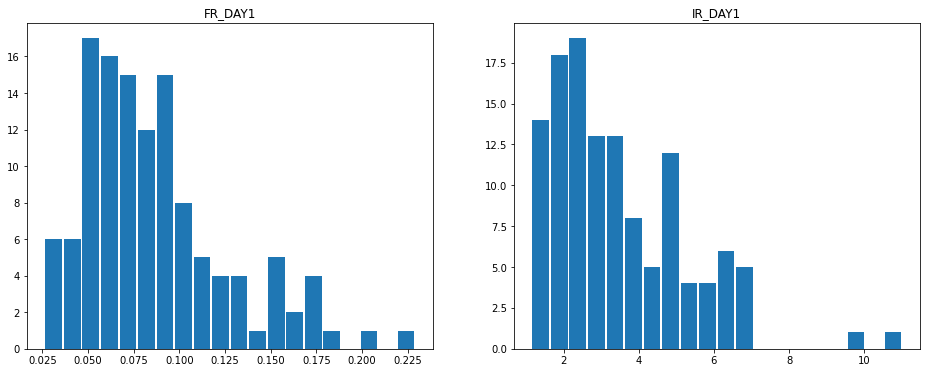

In [26]:
show_head123(test1d_head123,1)

(array([ 4.,  7.,  8.,  6., 19., 13., 20., 14.,  9.,  5.,  2.,  6.,  3.,
        3.,  2.,  1.,  0.,  0.,  0.,  1.]), array([0.02498195, 0.03444593, 0.04390991, 0.05337389, 0.06283787,
       0.07230185, 0.08176583, 0.09122981, 0.10069379, 0.11015777,
       0.11962176, 0.12908574, 0.13854972, 0.1480137 , 0.15747768,
       0.16694166, 0.17640564, 0.18586962, 0.1953336 , 0.20479758,
       0.21426157]), <BarContainer object of 20 artists>)
预测周期为2天的年化因子收益率均值为:0.08650719782988567
(array([15., 23., 13., 21., 10.,  9.,  6.,  5.,  9.,  6.,  3.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.]), array([1.03782982, 1.36244075, 1.68705169, 2.01166262, 2.33627355,
       2.66088449, 2.98549542, 3.31010635, 3.63471729, 3.95932822,
       4.28393916, 4.60855009, 4.93316102, 5.25777196, 5.58238289,
       5.90699382, 6.23160476, 6.55621569, 6.88082662, 7.20543756,
       7.53004849]), <BarContainer object of 20 artists>)
预测周期为2天的因子收益率IR均值为:2.4247301595700566


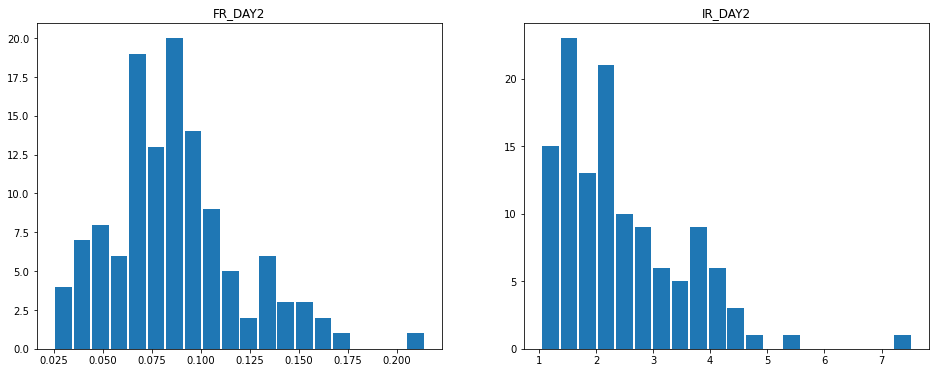

In [27]:
show_head123(test2d_head123,2)

(array([ 5.,  4.,  5.,  8., 17., 15., 14., 21., 12.,  9.,  4.,  3.,  3.,
        0.,  0.,  2.,  0.,  0.,  0.,  1.]), array([0.01769191, 0.02693621, 0.03618051, 0.04542481, 0.0546691 ,
       0.0639134 , 0.0731577 , 0.082402  , 0.0916463 , 0.1008906 ,
       0.1101349 , 0.1193792 , 0.1286235 , 0.1378678 , 0.1471121 ,
       0.1563564 , 0.1656007 , 0.174845  , 0.18408929, 0.19333359,
       0.20257789]), <BarContainer object of 20 artists>)
预测周期为3天的年化因子收益率均值为:0.07842535096091154
(array([ 7., 13., 26., 18., 15.,  9.,  8.,  8.,  8.,  4.,  3.,  2.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([0.59059418, 0.85099982, 1.11140546, 1.3718111 , 1.63221674,
       1.89262238, 2.15302802, 2.41343366, 2.6738393 , 2.93424494,
       3.19465058, 3.45505622, 3.71546186, 3.9758675 , 4.23627314,
       4.49667878, 4.75708442, 5.01749006, 5.2778957 , 5.53830135,
       5.79870699]), <BarContainer object of 20 artists>)
预测周期为3天的因子收益率IR均值为:1.801871340536731


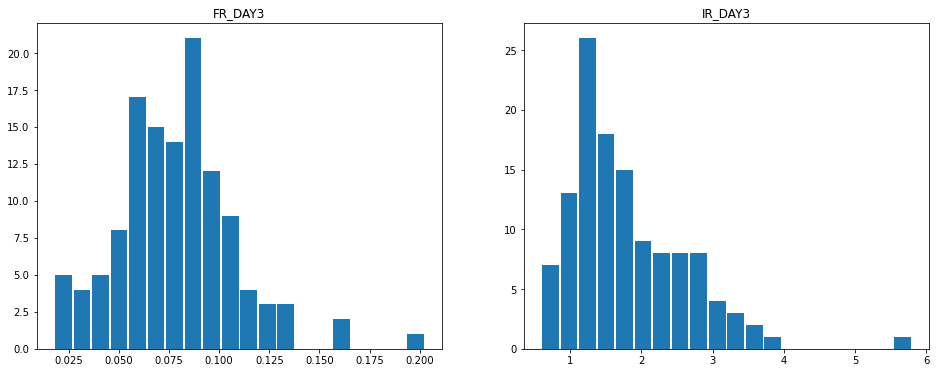

In [28]:
show_head123(test3d_head123,3)

(array([ 4.,  4.,  6.,  8., 12., 14., 21., 14., 17., 10.,  4.,  4.,  2.,
        0.,  0.,  1.,  1.,  0.,  0.,  1.]), array([0.01299304, 0.02186192, 0.0307308 , 0.03959968, 0.04846857,
       0.05733745, 0.06620633, 0.07507521, 0.08394409, 0.09281298,
       0.10168186, 0.11055074, 0.11941962, 0.1282885 , 0.13715739,
       0.14602627, 0.15489515, 0.16376403, 0.17263291, 0.18150179,
       0.19037068]), <BarContainer object of 20 artists>)
预测周期为4天的年化因子收益率均值为:0.07269264641217524
(array([ 3., 10., 23., 24., 17.,  7.,  9.,  8., 11.,  3.,  4.,  2.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([0.379751  , 0.59792087, 0.81609073, 1.0342606 , 1.25243047,
       1.47060034, 1.68877021, 1.90694008, 2.12510994, 2.34327981,
       2.56144968, 2.77961955, 2.99778942, 3.21595929, 3.43412915,
       3.65229902, 3.87046889, 4.08863876, 4.30680863, 4.5249785 ,
       4.74314836]), <BarContainer object of 20 artists>)
预测周期为4天的因子收益率IR均值为:1.4536898950519919


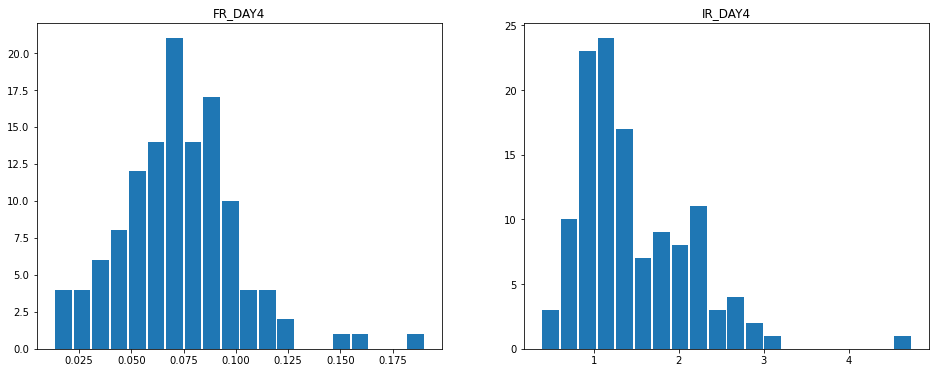

In [29]:
show_head123(test4d_head123,4)

(array([ 5.,  3.,  6.,  8., 10., 20., 19., 15., 16., 13.,  3.,  2.,  0.,
        0.,  2.,  0.,  0.,  0.,  0.,  1.]), array([0.00885859, 0.01791634, 0.0269741 , 0.03603185, 0.04508961,
       0.05414736, 0.06320512, 0.07226287, 0.08132063, 0.09037838,
       0.09943614, 0.10849389, 0.11755165, 0.1266094 , 0.13566716,
       0.14472491, 0.15378267, 0.16284042, 0.17189818, 0.18095594,
       0.19001369]), <BarContainer object of 20 artists>)
预测周期为5天的年化因子收益率均值为:0.06814488558182338
(array([ 4., 11., 17., 22., 22., 11.,  7., 11.,  9.,  4.,  3.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([0.2352175 , 0.43564019, 0.63606288, 0.83648557, 1.03690826,
       1.23733095, 1.43775364, 1.63817633, 1.83859902, 2.03902171,
       2.23944441, 2.4398671 , 2.64028979, 2.84071248, 3.04113517,
       3.24155786, 3.44198055, 3.64240324, 3.84282593, 4.04324862,
       4.24367131]), <BarContainer object of 20 artists>)
预测周期为5天的因子收益率IR均值为:1.2271737685880946


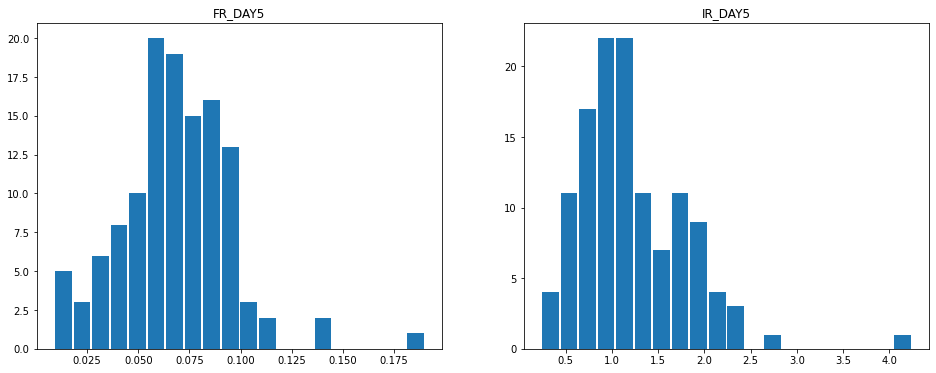

In [30]:
show_head123(test5d_head123,5)

In [31]:
corr_1d = resid_ret1d.corr()
corr_2d = resid_ret2d.corr()
corr_3d = resid_ret3d.corr()
corr_4d = resid_ret4d.corr()

In [32]:
corr_1d

,alpha_1_resid_ret,alpha_2_resid_ret,alpha_5_resid_ret,alpha_6_resid_ret,alpha_7_resid_ret,alpha_8_resid_ret,alpha_9_resid_ret,alpha_11_resid_ret,alpha_12_resid_ret,alpha_13_resid_ret,alpha_14_resid_ret,alpha_15_resid_ret,alpha_16_resid_ret,alpha_17_resid_ret,alpha_18_resid_ret,alpha_20_resid_ret,alpha_22_resid_ret,alpha_24_resid_ret,alpha_25_resid_ret,alpha_26_resid_ret,alpha_28_resid_ret,alpha_29_resid_ret,alpha_31_resid_ret,alpha_32_resid_ret,alpha_33_resid_ret,alpha_34_resid_ret,alpha_35_resid_ret,alpha_36_resid_ret,alpha_37_resid_ret,alpha_39_resid_ret,alpha_41_resid_ret,alpha_42_resid_ret,alpha_44_resid_ret,alpha_45_resid_ret,alpha_46_resid_ret,alpha_47_resid_ret,alpha_48_resid_ret,alpha_52_resid_ret,alpha_54_resid_ret,alpha_57_resid_ret,alpha_60_resid_ret,alpha_61_resid_ret,alpha_62_resid_ret,alpha_63_resid_ret,alpha_64_resid_ret,alpha_65_resid_ret,alpha_66_resid_ret,alpha_67_resid_ret,alpha_68_resid_ret,alpha_70_resid_ret,alpha_71_resid_ret,alpha_72_resid_ret,alpha_73_resid_ret,alpha_74_resid_ret,alpha_76_resid_ret,alpha_77_resid_ret,alpha_78_resid_ret,alpha_79_resid_ret,alpha_80_resid_ret,alpha_81_resid_ret,alpha_82_resid_ret,alpha_83_resid_ret,alpha_85_resid_ret,alpha_87_resid_ret,alpha_88_resid_ret,alpha_89_resid_ret,alpha_90_resid_ret,alpha_91_resid_ret,alpha_92_resid_ret,alpha_95_resid_ret,alpha_96_resid_ret,alpha_97_resid_ret,alpha_99_resid_ret,alpha_100_resid_ret,alpha_102_resid_ret,alpha_104_resid_ret,alpha_105_resid_ret,alpha_106_resid_ret,alpha_107_resid_ret,alpha_108_resid_ret,alpha_109_resid_ret,alpha_110_resid_ret,alpha_111_resid_ret,alpha_113_resid_ret,alpha_114_resid_ret,alpha_115_resid_ret,alpha_117_resid_ret,alpha_118_resid_ret,alpha_119_resid_ret,alpha_120_resid_ret,alpha_121_resid_ret,alpha_122_resid_ret,alpha_124_resid_ret,alpha_125_resid_ret,alpha_126_resid_ret,alpha_130_resid_ret,alpha_131_resid_ret,alpha_132_resid_ret,alpha_134_resid_ret,alpha_135_resid_ret,alpha_136_resid_ret,alpha_138_resid_ret,alpha_139_resid_ret,alpha_140_resid_ret,alpha_141_resid_ret,alpha_142_resid_ret,alpha_145_resid_ret,alpha_146_resid_ret,alpha_150_resid_ret,alpha_151_resid_ret,alpha_152_resid_ret,alpha_153_resid_ret,alpha_155_resid_ret,alpha_156_resid_ret,alpha_157_resid_ret,alpha_158_resid_ret,alpha_159_resid_ret,alpha_161_resid_ret,alpha_162_resid_ret,alpha_163_resid_ret,alpha_168_resid_ret,alpha_169_resid_ret,alpha_170_resid_ret,alpha_171_resid_ret,alpha_173_resid_ret,alpha_175_resid_ret,alpha_176_resid_ret,alpha_178_resid_ret,alpha_179_resid_ret,alpha_181_resid_ret,alpha_184_resid_ret,alpha_185_resid_ret,alpha_188_resid_ret,alpha_189_resid_ret,alpha_191_resid_ret,alpha_3_resid_ret,alpha_4_resid_ret,alpha_10_resid_ret,alpha_19_resid_ret,alpha_23_resid_ret,alpha_27_resid_ret,alpha_40_resid_ret,alpha_43_resid_ret,alpha_49_resid_ret,alpha_50_resid_ret,alpha_51_resid_ret,alpha_53_resid_ret,alpha_55_resid_ret,alpha_56_resid_ret,alpha_58_resid_ret,alpha_59_resid_ret,alpha_69_resid_ret,alpha_75_resid_ret,alpha_84_resid_ret,alpha_93_resid_ret,alpha_94_resid_ret,alpha_98_resid_ret,alpha_101_resid_ret,alpha_103_resid_ret,alpha_112_resid_ret,alpha_123_resid_ret,alpha_127_resid_ret,alpha_128_resid_ret,alpha_129_resid_ret,alpha_133_resid_ret,alpha_137_resid_ret,alpha_144_resid_ret,alpha_148_resid_ret,alpha_154_resid_ret,alpha_160_resid_ret,alpha_164_resid_ret,alpha_167_resid_ret,alpha_172_resid_ret,alpha_174_resid_ret,alpha_177_resid_ret,alpha_180_resid_ret,alpha_182_resid_ret,alpha_186_resid_ret,alpha_187_resid_ret
alpha_1_resid_ret,1.000000,0.113561,0.554301,0.135773,0.067091,0.464622,0.449202,0.491813,0.476025,-0.144309,0.491092,0.118810,0.501285,0.484409,0.477269,0.517120,0.411431,0.498187,0.546481,0.438366,0.120614,0.505110,0.481748,0.487371,0.428346,0.482018,0.486426,0.424090,0.380729,0.441641,0.151222,0.235639,0.442912,0.310787,0.458975,0.515198,0.394351,0.449578,0.116162,0.530718,0.400461,0.419869,0.333252,0.477565,0.144415,0.385833,0.385961,0.477556,0.450117,0.290687,0.469097,0.483755,0.352672,0.318611,-0.051089,-0.21882

In [33]:
list0 = []
for row in range(0,179):
    for col in range(row+1,179):
        list0.append(corr_1d.iloc[row,col]) 

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

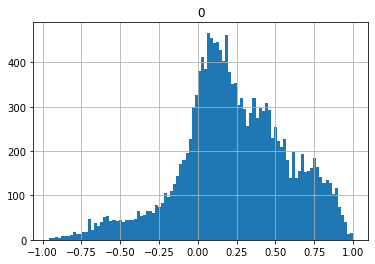

In [34]:
pd.Series(list0).to_frame().hist(bins= 100)

In [35]:
alpha_head20_list = ['alpha_15_resid_ret','alpha_120_resid_ret','alpha_80_resid_ret','alpha_32_resid_ret','alpha_16_resid_ret','alpha_42_resid_ret','alpha_13_resid_ret',
                     'alpha_124_resid_ret','alpha_102_resid_ret','alpha_5_resid_ret','alpha_168_resid_ret','alpha_11_resid_ret','alpha_36_resid_ret','alpha_114_resid_ret',
                     'alpha_12_resid_ret','alpha_74_resid_ret','alpha_140_resid_ret','alpha_179_resid_ret','alpha_108_resid_ret','alpha_9_resid_ret']

In [36]:
alpha_head40_list = ['alpha_15_resid_ret','alpha_120_resid_ret','alpha_80_resid_ret','alpha_32_resid_ret','alpha_16_resid_ret','alpha_42_resid_ret','alpha_13_resid_ret',
                     'alpha_124_resid_ret','alpha_102_resid_ret','alpha_5_resid_ret','alpha_168_resid_ret','alpha_11_resid_ret','alpha_36_resid_ret','alpha_114_resid_ret',
                     'alpha_12_resid_ret','alpha_74_resid_ret','alpha_140_resid_ret','alpha_179_resid_ret','alpha_108_resid_ret','alpha_9_resid_ret','alpha_68_resid_ret',
                     'alpha_90_resid_ret','alpha_139_resid_ret','alpha_109_resid_ret','alpha_62_resid_ret','alpha_1_resid_ret','alpha_107_resid_ret','alpha_145_resid_ret',
                     'alpha_176_resid_ret','alpha_60_resid_ret','alpha_188_resid_ret','alpha_91_resid_ret','alpha_105_resid_ret','alpha_158_resid_ret','alpha_121_resid_ret',
                     'alpha_75_resid_ret','alpha_163_resid_ret','alpha_99_resid_ret','alpha_171_resid_ret','alpha_48_resid_ret']

In [37]:
alpha_head60_list = ['alpha_15_resid_ret','alpha_120_resid_ret','alpha_80_resid_ret','alpha_32_resid_ret','alpha_16_resid_ret','alpha_42_resid_ret','alpha_13_resid_ret',
                     'alpha_124_resid_ret','alpha_102_resid_ret','alpha_5_resid_ret','alpha_168_resid_ret','alpha_11_resid_ret','alpha_36_resid_ret','alpha_114_resid_ret',
                     'alpha_12_resid_ret','alpha_74_resid_ret','alpha_140_resid_ret','alpha_179_resid_ret','alpha_108_resid_ret','alpha_9_resid_ret','alpha_68_resid_ret',
                     'alpha_90_resid_ret','alpha_139_resid_ret','alpha_109_resid_ret','alpha_62_resid_ret','alpha_1_resid_ret','alpha_107_resid_ret','alpha_145_resid_ret',
                     'alpha_176_resid_ret','alpha_60_resid_ret','alpha_188_resid_ret','alpha_91_resid_ret','alpha_105_resid_ret','alpha_158_resid_ret','alpha_121_resid_ret',
                     'alpha_75_resid_ret','alpha_163_resid_ret','alpha_99_resid_ret','alpha_171_resid_ret','alpha_48_resid_ret','alpha_3_resid_ret','alpha_83_resid_ret',
                     'alpha_100_resid_ret','alpha_4_resid_ret','alpha_156_resid_ret','alpha_73_resid_ret','alpha_55_resid_ret','alpha_97_resid_ret','alpha_43_resid_ret',
                     'alpha_150_resid_ret','alpha_95_resid_ret','alpha_35_resid_ret','alpha_155_resid_ret','alpha_180_resid_ret','alpha_41_resid_ret','alpha_136_resid_ret',
                     'alpha_24_resid_ret','alpha_70_resid_ret','alpha_141_resid_ret','alpha_40_resid_ret']

In [38]:
alpha_head80_list = ['alpha_15_resid_ret','alpha_120_resid_ret','alpha_80_resid_ret','alpha_32_resid_ret','alpha_16_resid_ret','alpha_42_resid_ret','alpha_13_resid_ret',
                     'alpha_124_resid_ret','alpha_102_resid_ret','alpha_5_resid_ret','alpha_168_resid_ret','alpha_11_resid_ret','alpha_36_resid_ret','alpha_114_resid_ret',
                     'alpha_12_resid_ret','alpha_74_resid_ret','alpha_140_resid_ret','alpha_179_resid_ret','alpha_108_resid_ret','alpha_9_resid_ret','alpha_68_resid_ret',
                     'alpha_90_resid_ret','alpha_139_resid_ret','alpha_109_resid_ret','alpha_62_resid_ret','alpha_1_resid_ret','alpha_107_resid_ret','alpha_145_resid_ret',
                     'alpha_176_resid_ret','alpha_60_resid_ret','alpha_188_resid_ret','alpha_91_resid_ret','alpha_105_resid_ret','alpha_158_resid_ret','alpha_121_resid_ret',
                     'alpha_75_resid_ret','alpha_163_resid_ret','alpha_99_resid_ret','alpha_171_resid_ret','alpha_48_resid_ret','alpha_3_resid_ret','alpha_83_resid_ret',
                     'alpha_100_resid_ret','alpha_4_resid_ret','alpha_156_resid_ret','alpha_73_resid_ret','alpha_55_resid_ret','alpha_97_resid_ret','alpha_43_resid_ret',
                     'alpha_150_resid_ret','alpha_95_resid_ret','alpha_35_resid_ret','alpha_155_resid_ret','alpha_180_resid_ret','alpha_41_resid_ret','alpha_136_resid_ret',
                     'alpha_24_resid_ret','alpha_70_resid_ret','alpha_141_resid_ret','alpha_40_resid_ret','alpha_182_resid_ret','alpha_77_resid_ret','alpha_128_resid_ret',
                     'alpha_104_resid_ret','alpha_191_resid_ret','alpha_118_resid_ret','alpha_33_resid_ret','alpha_117_resid_ret','alpha_14_resid_ret','alpha_130_resid_ret',
                     'alpha_122_resid_ret','alpha_185_resid_ret','alpha_72_resid_ret','alpha_82_resid_ret','alpha_47_resid_ret','alpha_81_resid_ret','alpha_69_resid_ret',
                     'alpha_17_resid_ret','alpha_94_resid_ret','alpha_184_resid_ret']

In [39]:
corr_1d_head20 = corr_1d.loc[alpha_head20_list,alpha_head20_list]

In [40]:
corr_1d_head40 = corr_1d.loc[alpha_head40_list,alpha_head40_list]

In [41]:
corr_1d_head60 = corr_1d.loc[alpha_head60_list,alpha_head60_list]

In [42]:
corr_1d_head80 = corr_1d.loc[alpha_head80_list,alpha_head80_list]

In [43]:
list20 = []
for row in range(0,20):
    for col in range(row+1,20):
        list20.append(corr_1d_head20.iloc[row,col]) 

In [44]:
list40 = []
for row in range(0,40):
    for col in range(row+1,40):
        list40.append(corr_1d_head40.iloc[row,col]) 

In [45]:
list60 = []
for row in range(0,60):
    for col in range(row+1,60):
        list60.append(corr_1d_head60.iloc[row,col]) 

In [46]:
list80 = []
for row in range(0,80):
    for col in range(row+1,80):
        list80.append(corr_1d_head80.iloc[row,col]) 

In [47]:
pd.Series(list20).to_frame().mean()

0    0.288957
dtype: float64

In [48]:
pd.Series(list40).to_frame().mean()

0    0.298346
dtype: float64

In [49]:
pd.Series(list60).to_frame().mean()

0    0.321668
dtype: float64

In [50]:
pd.Series(list80).to_frame().mean()

0    0.320151
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

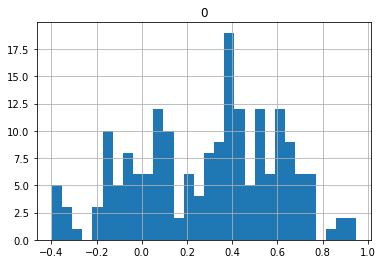

In [51]:
pd.Series(list20).to_frame().hist(bins= 30)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

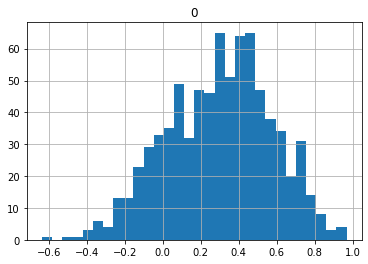

In [52]:
pd.Series(list40).to_frame().hist(bins= 30)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

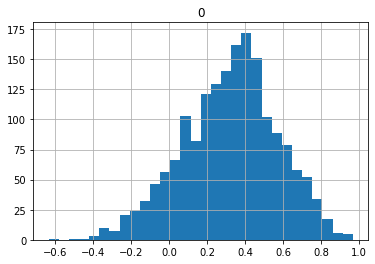

In [53]:
pd.Series(list60).to_frame().hist(bins= 30)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

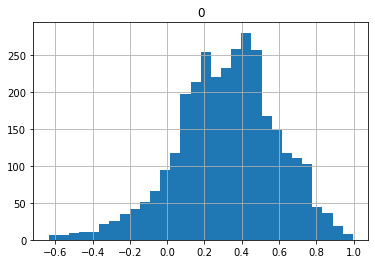

In [54]:
pd.Series(list80).to_frame().hist(bins= 30)